<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,96.046820,255.098859,361.145680,-31.617981,392.763661
1,0.0,1.0,25.802863,-2.969659,32.833203,28.925560,3.907643
2,0.0,2.0,49.518155,-37.634028,21.884128,8.485257,13.398871
3,0.0,3.0,48.688446,430.119888,488.808334,9.200387,479.607947
4,0.0,4.0,24.515784,69.244713,103.760497,30.034898,73.725599
...,...,...,...,...,...,...,...
29995,999.0,25.0,79.721953,-718.502468,-628.780515,84.191224,-712.971739
29996,999.0,26.0,79.071046,429.342362,518.413408,82.729842,435.683567
29997,999.0,27.0,26.411616,178.600780,215.012396,-35.498321,250.510717
29998,999.0,28.0,87.423717,1322.675195,1420.098912,101.482816,1318.616096


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    96.046820   255.098859   361.145680  -31.617981   392.763661
      1.0    25.802863    -2.969659    32.833203   28.925560     3.907643
      2.0    49.518155   -37.634028    21.884128    8.485257    13.398871
      3.0    48.688446   430.119888   488.808334    9.200387   479.607947
      4.0    24.515784    69.244713   103.760497   30.034898    73.725599
...                ...          ...          ...         ...          ...
999.0 25.0   79.721953  -718.502468  -628.780515   84.191224  -712.971739
      26.0   79.071046   429.342362   518.413408   82.729842   435.683567
      27.0   26.411616   178.600780   215.012396  -35.498321   250.510717
      28.0   87.423717  1322.675195  1420.098912  101.482816  1318.616096
      29.0   72.152731   190.691330   272.844061   67.197207   205.646854

[30000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    96.046820   255.098859   361.145680  -31.617981   392.763661
      1.0    25.802863    -2.969659    32.833203   28.925560     3.907643
      2.0    49.518155   -37.634028    21.884128    8.485257    13.398871
      3.0    48.688446   430.119888   488.808334    9.200387   479.607947
      4.0    24.515784    69.244713   103.760497   30.034898    73.725599
...                ...          ...          ...         ...          ...
999.0 25.0   79.721953  -718.502468  -628.780515   84.191224  -712.971739
      26.0   79.071046   429.342362   518.413408   82.729842   435.683567
      27.0   26.411616   178.600780   215.012396  -35.498321   250.510717
      28.0   87.423717  1322.675195  1420.098912  101.482816  1318.616096
      29.0   72.152731   190.691330   272.844061   67.197207   205.646854

[30000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,96.046820,255.098859,361.145680,-31.617981,392.763661
1,0.0,1.0,25.802863,-2.969659,32.833203,28.925560,3.907643
2,0.0,2.0,49.518155,-37.634028,21.884128,8.485257,13.398871
3,0.0,3.0,48.688446,430.119888,488.808334,9.200387,479.607947
4,0.0,4.0,24.515784,69.244713,103.760497,30.034898,73.725599
...,...,...,...,...,...,...,...
29995,999.0,25.0,79.721953,-718.502468,-628.780515,84.191224,-712.971739
29996,999.0,26.0,79.071046,429.342362,518.413408,82.729842,435.683567
29997,999.0,27.0,26.411616,178.600780,215.012396,-35.498321,250.510717
29998,999.0,28.0,87.423717,1322.675195,1420.098912,101.482816,1318.616096


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    96.046820   255.098859   361.145680  -31.617981   392.763661
      1.0    25.802863    -2.969659    32.833203   28.925560     3.907643
      2.0    49.518155   -37.634028    21.884128    8.485257    13.398871
      3.0    48.688446   430.119888   488.808334    9.200387   479.607947
      4.0    24.515784    69.244713   103.760497   30.034898    73.725599
...                ...          ...          ...         ...          ...
999.0 25.0   79.721953  -718.502468  -628.780515   84.191224  -712.971739
      26.0   79.071046   429.342362   518.413408   82.729842   435.683567
      27.0   26.411616   178.600780   215.012396  -35.498321   250.510717
      28.0   87.423717  1322.675195  1420.098912  101.482816  1318.616096
      29.0   72.152731   190.691330   272.844061   67.197207   205.646854

[30000 rows x 5 columns]

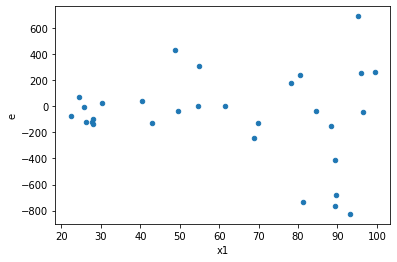

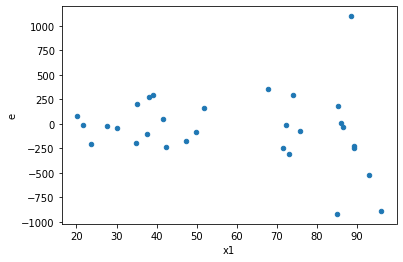

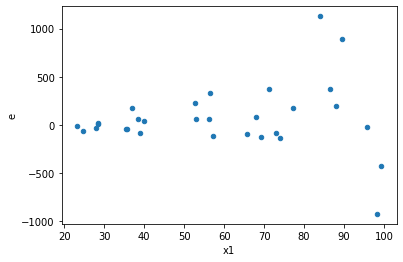

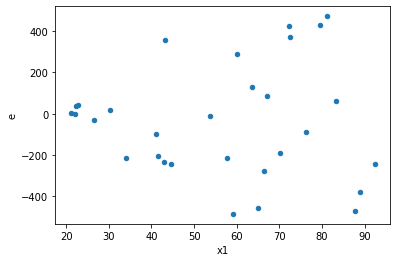

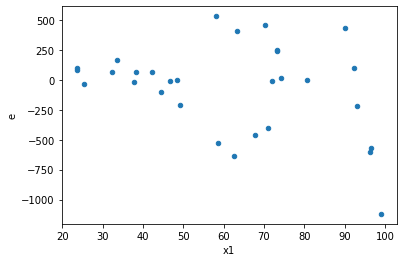

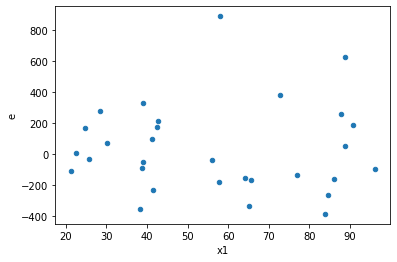

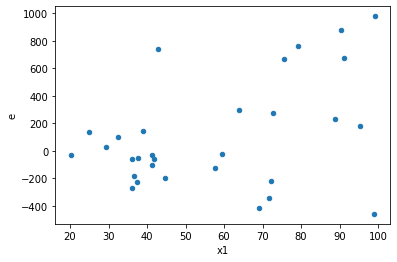

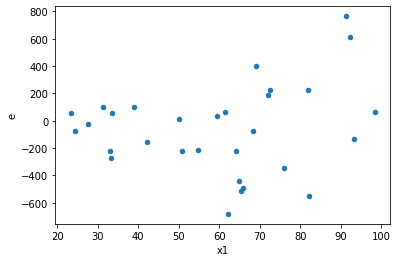

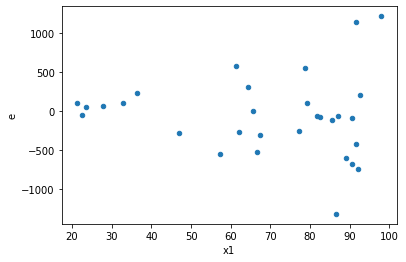

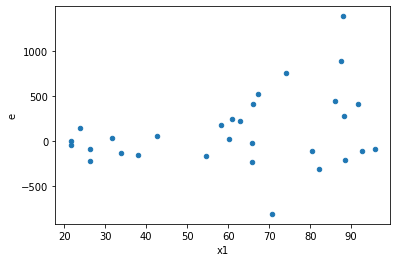

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,14.0,14.0,420743.2705342443,3194466.5291939,30053.090752446024,228176.18065670715,7.592436416481918,0.0005226805193907502,0.9997386597403046,0.0002613402596953751,Reject001=0 : Heteroscedasticity
2.0,15.0,13.0,168059.33930727546,3286456.8696360583,11203.955953818364,252804.37458738912,22.56384937868594,1.4180136855834746e-06,0.9999992909931572,7.090068427917373e-07,Reject001=0 : Heteroscedasticity
4.0,13.0,15.0,649309.2912123989,2747640.2077349657,49946.86855479992,183176.0138489977,3.667417380691715,0.018637195421195907,0.990681402289402,0.009318597710597953,Reject001=1 : Homoscedasticity
7.0,11.0,17.0,184080.80754198442,2280658.752047083,16734.61886745313,134156.39717924016,8.016698691606214,0.0001853334325128131,0.9999073332837436,9.266671625640654e-05,Reject001=0 : Heteroscedasticity
12.0,11.0,17.0,664780.8993923571,3694670.266442118,60434.62721748701,217333.5450848305,3.5961758199104787,0.018016363279429015,0.9909918183602855,0.009008181639714508,Reject001=1 : Homoscedasticity
15.0,15.0,13.0,204416.2542658237,3339848.150499429,13627.750284388247,256911.39619226378,18.852076889505216,4.177929888493637e-06,0.9999979110350558,2.0889649442468183e-06,Reject001=0 : Heteroscedasticity
16.0,18.0,10.0,1069744.8844831602,1423075.855584995,59430.27136017557,142307.5855584995,2.3945303008301644,0.16026901889010747,0.9198654905549463,0.08013450944505374,Reject001=1 : Homoscedasticity
17.0,14.0,14.0,283995.77401043416,1221655.7038432192,20285.412429316726,87261.12170308709,4.301668600879727,0.009973804808132591,0.9950130975959337,0.004986902404066296,Reject001=0 : Heteroscedasticity
19.0,20.0,8.0,252925.74578245825,1788188.2990397303,12646.287289122913,223523.5373799663,17.675032384581296,0.0002921827879811545,0.9998539086060094,0.00014609139399057725,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,14.0,14.0,2812103.6543976963,288239.0258217019,200864.5467426926,20588.50184440728,0.10249943147399299,0.0001240736958432767,Reject001=0 : Heteroscedasticity
1.0,14.0,14.0,420743.2705342443,3194466.5291939,30053.090752446024,228176.18065670715,7.592436416481918,0.0005226805193907502,Reject001=0 : Heteroscedasticity
2.0,15.0,13.0,168059.33930727546,3286456.8696360583,11203.955953818364,252804.37458738912,22.56384937868594,1.4180136855834746e-06,Reject001=0 : Heteroscedasticity
3.0,17.0,11.0,1854875.5548185713,292371.57294135913,109110.32675403361,26579.23390375992,0.24359961787739157,0.009326584503541251,Reject001=0 : Heteroscedasticity
4.0,13.0,15.0,649309.2912123989,2747640.2077349657,49946.86855479992,183176.0138489977,3.667417380691715,0.018637195421195907,Reject001=1 : Homoscedasticity
5.0,12.0,16.0,975224.5556964716,1204473.460172905,81268.71297470597,75279.59126080656,0.9263047057757213,0.9100457953826843,Reject001=1 : Homoscedasticity
6.0,12.0,16.0,2760396.614889072,826505.171459944,230033.05124075597,51656.5732162465,0.22456152686590228,0.012340924073097326,Reject001=1 : Homoscedasticity
7.0,11.0,17.0,184080.80754198442,2280658.752047083,16734.61886745313,134156.39717924016,8.016698691606214,0.0001853334325128131,Reject001=0 : Heteroscedasticity
8.0,22.0,6.0,7462662.026276547,122830.03204498737,339211.9102852976,20471.672007497895,0.06035068754006894,7.498619225498346e-07,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    679
Reject001=1 : Homoscedasticity      321
Name: Result_test, dtype: int64